<a href="https://colab.research.google.com/github/SandipKankal/Data_Science/blob/main/Q3_Assignment_ANN_CementcompressiveStrength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Import necessary libraries for MLP and reshaping the data structres
import numpy as np
# from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
# from keras.layers import Dropout,Flatten
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(10)

In [3]:
# Loading the data set using pandas as data frame format 
import pandas as pd
data = pd.read_csv("/content/concrete.csv")

In [4]:
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [5]:
data.shape

(1030, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [9]:
data_transpose = data.describe().T
data_transpose

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [10]:
concrete_data = data.copy()

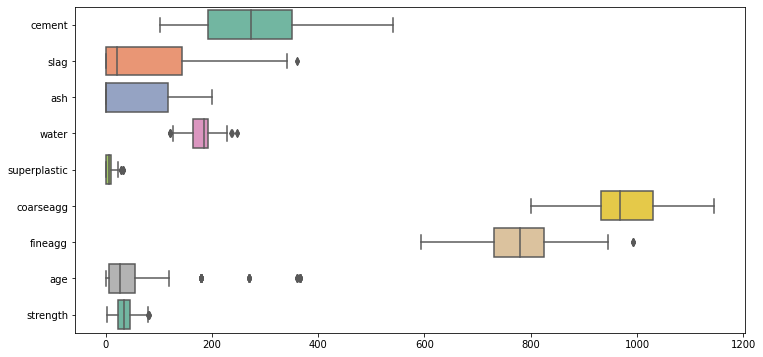

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=concrete_data, orient="h", palette="Set2", dodge=False)

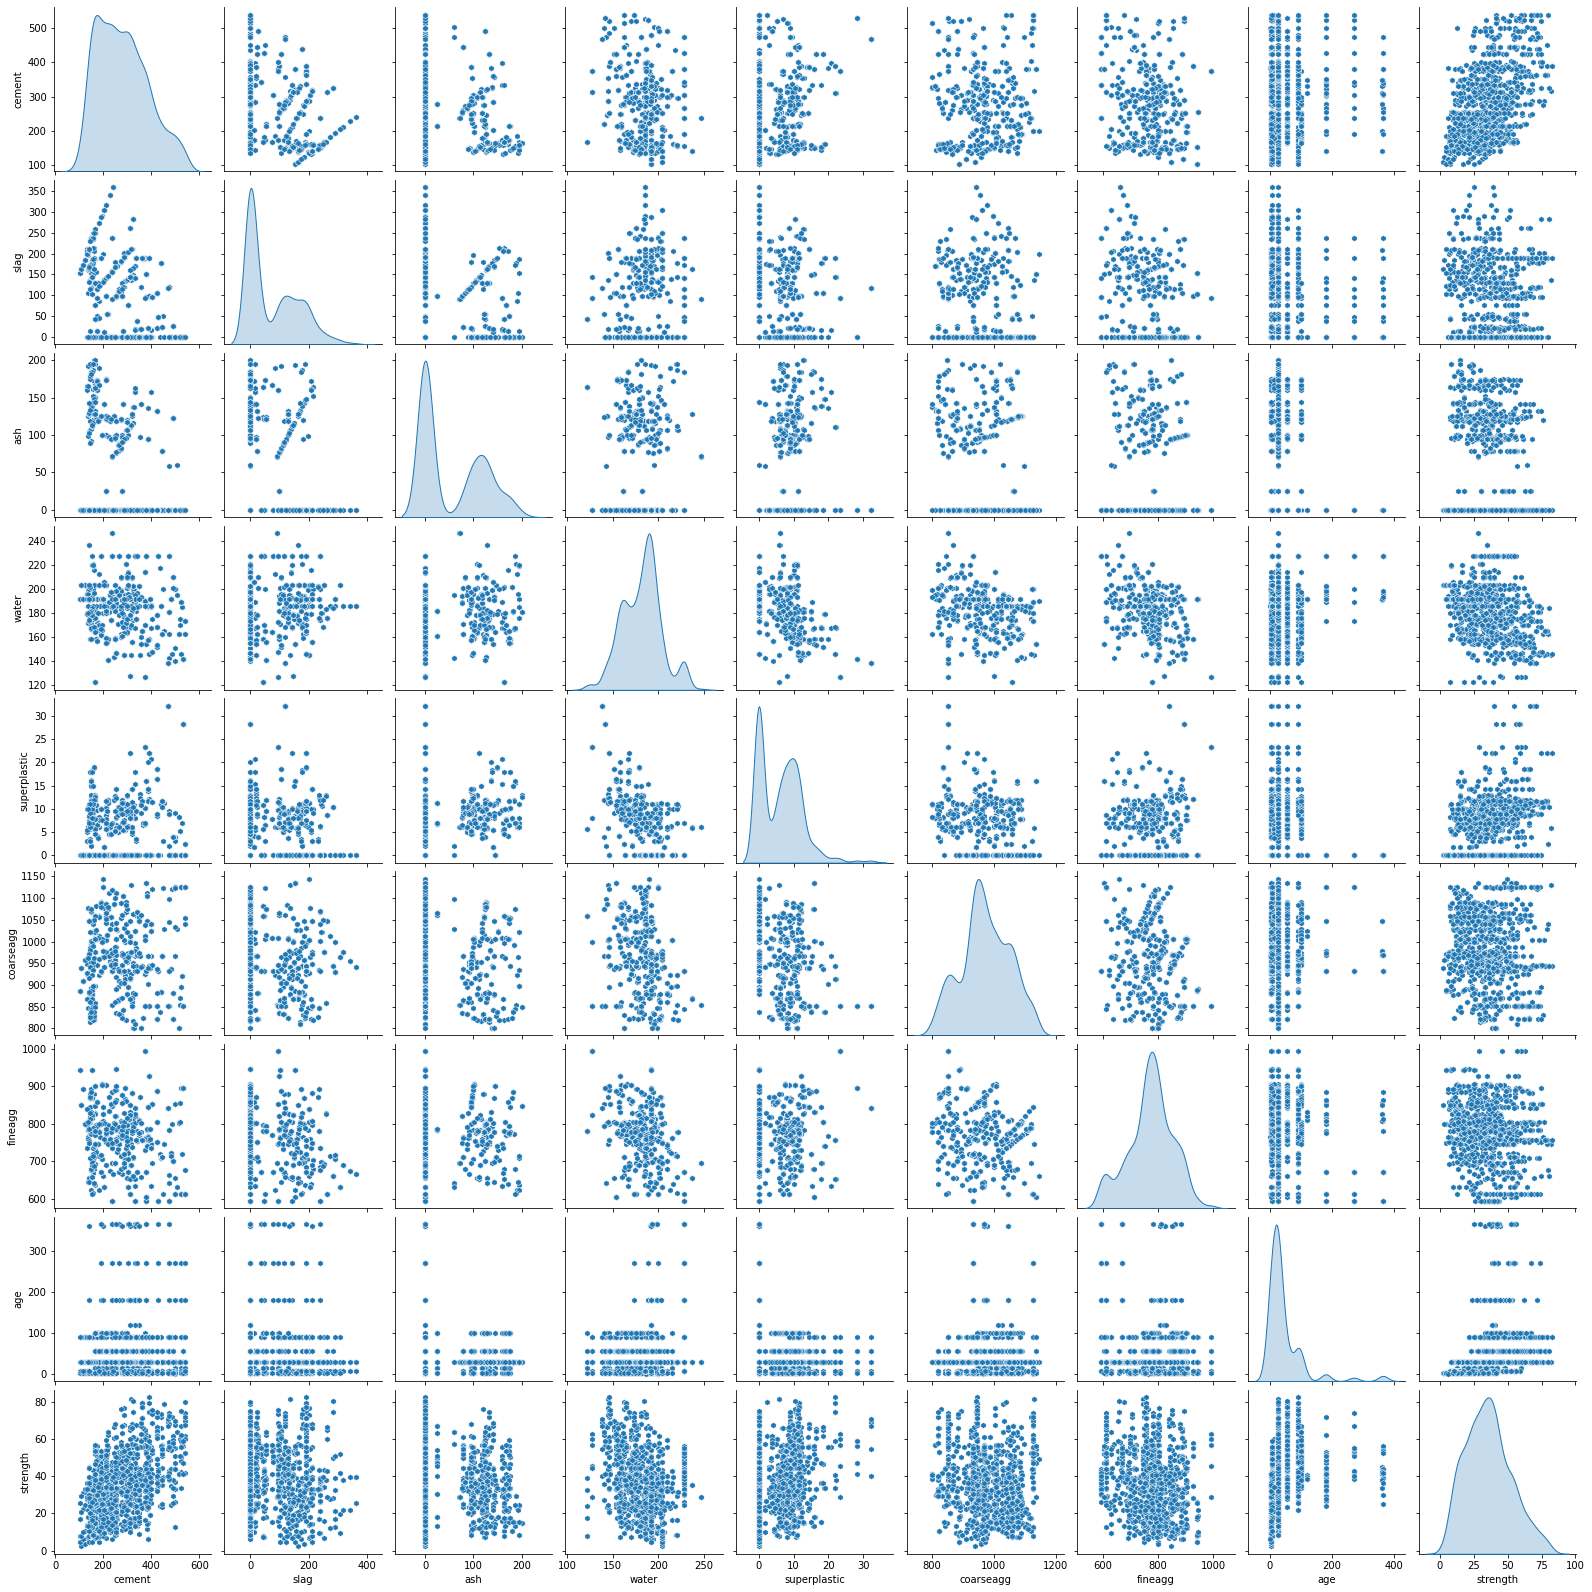

In [13]:
sns.pairplot(concrete_data,markers="h", diag_kind = 'kde')
plt.show()

In [14]:
concrete_data.corr

<bound method DataFrame.corr of       cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
0        29.89  
1        23.51  
2   

In [16]:
train, test = train_test_split(data, test_size = 0.2)

x_train = train.iloc[:,0:8].values.astype("float32")
x_test = test.iloc[:,0:8].values.astype("float32")
y_train = train.strength.values.astype("float32")
y_train = train.strength.values.astype("float32")
y_test = test.strength.values.astype("float32")

In [17]:
def norm_func(i):
     x = ((i-i.min())/(i.max()-i.min()))
     return (x)

x_train = norm_func(x_train)
x_test = norm_func(x_test)
y_train = norm_func(y_train)
y_test = norm_func(y_test)

In [18]:
# one hot encoding outputs for both train and test data sets 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [19]:
# Storing the number of classes into the variable num_of_classes 
num_of_classes = y_test.shape[1]
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(206, 2)

In [20]:
# Creating a user defined function to return the model for which we are
# giving the input to train the ANN mode
def design_mlp():
    # Initializing the model 
    model = Sequential()
    model.add(Dense(500,input_dim =8,activation="relu"))
    model.add(Dense(200,activation="tanh"))
    model.add(Dense(100,activation="tanh"))
    model.add(Dense(50,activation="tanh"))
    model.add(Dense(num_of_classes,activation="linear"))
    model.compile(loss="mean_squared_error",optimizer="adam",metrics = 
    ["accuracy"])
    return model

# building a cnn model using train data set and validating on test data set
model = design_mlp()

In [21]:
# fitting model on train data

model.fit(x=x_train,y=y_train,batch_size=1000,epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.5194 - accuracy: 0.0012
Epoch 2/10
1/1 [==============================] - 0s 25ms/step - loss: 0.0527 - accuracy: 0.9988
Epoch 3/10
1/1 [==============================] - 0s 27ms/step - loss: 0.0523 - accuracy: 0.9988
Epoch 4/10
1/1 [==============================] - 0s 28ms/step - loss: 0.1625 - accuracy: 0.9988
Epoch 5/10
1/1 [==============================] - 0s 24ms/step - loss: 0.1380 - accuracy: 0.9988
Epoch 6/10
1/1 [==============================] - 0s 24ms/step - loss: 0.0633 - accuracy: 0.9988
Epoch 7/10
1/1 [==============================] - 0s 25ms/step - loss: 0.0143 - accuracy: 0.9988
Epoch 8/10
1/1 [==============================] - 0s 26ms/step - loss: 0.0068 - accuracy: 0.9988
Epoch 9/10
1/1 [==============================] - 0s 27ms/step - loss: 0.0247 - accuracy: 0.9988
Epoch 10/10
1/1 [==============================] - 0s 29ms/step - loss: 0.0465 - accuracy: 0.9988


In [22]:
# Evaluating the model on test data  
eval_score_test = model.evaluate(x_test,y_test,verbose = 1)
print ("Accuracy: %.3f%%" %(eval_score_test[1]*100)) 

7/7 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9951
Accuracy: 99.515%


In [23]:
# accuracy score on train data 
eval_score_train = model.evaluate(x_train,y_train,verbose=0)
print ("Accuracy: %.3f%%" %(eval_score_train[1]*100)) 

Accuracy: 99.879%
